This notebook is used for explaining the steps involved in creating a Decision Tree model 


1. Import the required libraries
2. Download the required dataset
3. Read the Dataset 
4. Observe the DataSet
5. Converting labels into integers
6. Build a Decision Tree model
7. Training the Decision Tree model
8. Visualize the classification as done by Decision Tree
9. Making Prediction using Trained Model
10. Printing the Test Accuracy
11. Printing the Classification Report

## Import the required libraries

In [30]:
import pandas as pd                                    # For doing data manipulations
import numpy as np                                     # Used to do linear algebra operations
import zipfile                                         # It deals with extracting the zipfile
from sklearn.model_selection import train_test_split   # Library to do train test split
import graphviz                                        # For plotting graphs
from sklearn import tree                               # For using various tree functions  
from sklearn.tree import DecisionTreeClassifier        # Library to build Decision Tree Model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## Donwload the required dataset

In [29]:
!gdown --id 14MSpiF1oebN4Kfkc-FxaZVeQt7vNWQVN                     # Importing the data set  

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=14MSpiF1oebN4Kfkc-FxaZVeQt7vNWQVN
To: /content/iris.zip
100% 1.01k/1.01k [00:00<00:00, 1.15MB/s]


In [31]:
with zipfile.ZipFile("/content/iris.zip","r") as zip_ref:         # Extracting the data
    zip_ref.extractall("/content")                                              

## Read dataset

In [32]:
data = pd.read_csv('/content/iris.csv')                # Store dataset in dataframe
X = data.iloc[:,:-1]                                                             
y = data.iloc[:,-1]                                                             

## Observe the DataSet

In [33]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [34]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [35]:
y.shape

(150,)

In [36]:
type(y[0])

str

## Converting labels into integers

In [37]:
for i in range(len(y)):
  if(y[i]=="Iris-setosa"):        # Assigning different integer for different label
    y[i]=0
  elif(y[i]=="Iris-versicolor"):
    y[i]=1
  else:
    y[i]=2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


#### Converting X and Y into numpy arrays

In [38]:
y=list(y)                                            
y=np.array(y)
X=np.array(X)

In [39]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [40]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 33, test_size = 0.20)

## Build a Decision Tree model

In [42]:
model = DecisionTreeClassifier()


## Training the Decision Tree model

In [43]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

## Visualize the classification as done by Decision Tree

In [44]:
datasrc = tree.export_graphviz(model,
                               feature_names=['sepal_length','sepal_width','petal_length','petal_width'],
                               class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'],filled=True) 
visual = graphviz.Source(datasrc)
visual.render("Gini")

'Gini.pdf'

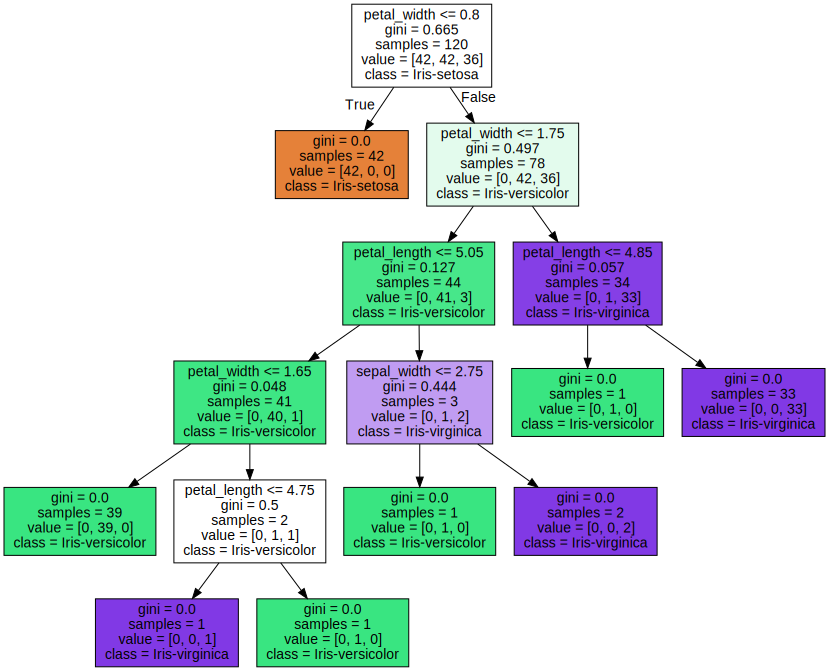

In [45]:
visual

## Making Prediction using Trained Model

In [46]:
y_pred = model.predict(X_test)

## Printing the test accuracy

In [47]:
accuracy_score(y_pred,y_test)

0.8666666666666667

## Printing the Classification Report

In [48]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.67      0.80        12
           2       0.71      1.00      0.83        10

    accuracy                           0.87        30
   macro avg       0.90      0.89      0.88        30
weighted avg       0.90      0.87      0.86        30

